## Regularization in Regression
Regularization in machine learning is a technique used to prevent overfitting by adding a penalty term to the loss function. This penalty term discourages the learning algorithm from fitting the training data too closely, which can lead to poor generalization to unseen data. Regularization techniques such as Ridge, Lasso, and Elastic Net are commonly used to achieve this.

The OLS loss function is given by:

$$
\text{Loss}_{\text{OLS}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

1. **Ridge Regularization (L2 regularization):** Ridge regression adds a penalty term that is proportional to the square of the magnitude of the coefficients. The loss function for Ridge regression is given by:

   $$
   \text{Loss}_{\text{Ridge}} = \text{Loss}_{\text{OLS}} + \lambda \sum_{i=1}^{n} \beta_i^2
   $$

   Ridge regularization encourages smaller coefficient values and can be useful to mitigate multicollinearity in the data.

2. **Lasso Regularization (L1 regularization):** Lasso regression adds a penalty term that is proportional to the absolute value of the coefficients. The loss function for Lasso regression is given by:

   $$
   \text{Loss}_{\text{Lasso}} = \text{Loss}_{\text{OLS}} + \lambda \sum_{i=1}^{n} |\beta_i|
   $$

   Lasso regularization encourages sparsity in the coefficients, leading to some coefficients being exactly zero. This can be useful for feature selection.

3. **Elastic Net Regularization:** Elastic Net combines the penalties of Ridge and Lasso regularization. It adds both the L1 (Lasso) and L2 (Ridge) penalty terms to the loss function. The loss function for Elastic Net is given by:

   $$
   \text{Loss}_{\text{ElasticNet}} = \text{Loss}_{\text{OLS}} + \lambda_1 \sum_{i=1}^{n} |\beta_i| + \lambda_2 \sum_{i=1}^{n} \beta_i^2
   $$

   Where:
   - $$\lambda_1\ and \lambda_2\ $$ are the regularization parameters for the L1 and L2 penalties, respectively.

   Elastic Net combines the advantages of Ridge and Lasso regularization, allowing for both coefficient shrinkage and variable selection.

### Regularication Coefficients
The preferred range of values for regularization coefficients 𝜆 in Ridge and Lasso, and 𝜆1 𝑎𝑛𝑑𝜆2 in Elastic Net depends on the specific dataset and problem you are working on. However, there are some common approaches to choosing these values:

1. **Grid Search:** One common approach is to perform a grid search over a range of values for the regularization coefficients. This involves trying out different values and selecting the one that gives the best performance on a validation set.

2. **Cross-Validation:** Another approach is to use cross-validation to evaluate the performance of the model for different values of the regularization coefficients. This helps in selecting the best values that generalize well to unseen data.

3. **Heuristic Values:** In practice, some heuristic values are often used as starting points. For example, values such as 0.01, 0.1, 1, 10, etc., are commonly used for the regularization coefficients.

4. **Normalization:** The scale of the features can also affect the choice of regularization coefficients. It is often recommended to normalize the features before applying regularization, as this can help in choosing appropriate values for the coefficients.

In summary, there is no one-size-fits-all answer to the preferred range of values for regularization coefficients. It often requires experimentation and tuning based on the specific dataset and problem at hand.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = pd.read_csv("Boston.csv")
# print(boston_dataset.DESCR)
boston_dataset

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:

# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [3]:
boston_pd = boston_dataset.drop("Unnamed: 0", axis =1)

In [7]:
boston_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
boston_pd.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

In [4]:
# Separate the predictors from predicted 
X = boston_pd.iloc[:, :-1] 
Y = boston_pd.iloc[:, -1] 

In [5]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=10)
y_train

167    23.8
318    23.1
99     33.2
307    28.2
404     8.5
       ... 
320    23.8
15     19.9
484    20.6
125    21.4
265    22.8
Name: medv, Length: 379, dtype: float64

In [9]:
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

In [10]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
reg_coefficient = pd.DataFrame() 
reg_coefficient["Columns"] = x_train.columns 
reg_coefficient['Normal_Reg_Coeff'] = pd.Series(lreg.coef_) 
reg_coefficient

Mean squared Error on test set :  32.44253669600662


,Columns,Normal_Reg_Coeff
0,crim,-0.125880
1,zn,0.057570
2,indus,-0.016418
3,chas,1.264245
4,nox,-15.388911
5,rm,3.494769
6,age,0.011489
7,dis,-1.470710
8,rad,0.292530
9,tax,-0.012213


<Axes: xlabel='Normal_Reg_Coeff', ylabel='Columns'>

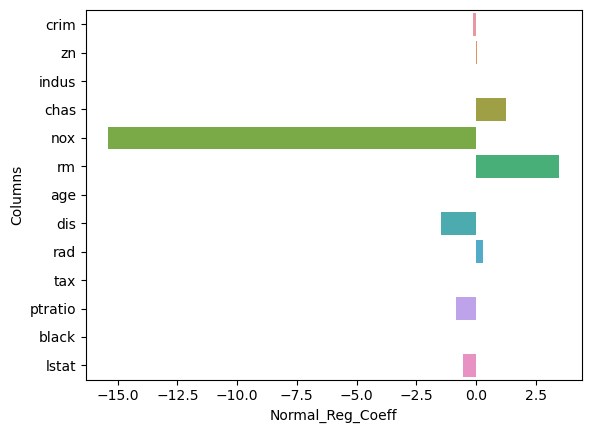

In [11]:
import seaborn as sns
sns.barplot(x='Normal_Reg_Coeff' , y='Columns', data=reg_coefficient)

In [15]:
# import ridge regression from sklearn library (L2)
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 3) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
# ridge_coefficient = pd.DataFrame() 
# ridge_coefficient["Columns"]= x_train.columns 
reg_coefficient['Ridge_Reg_Coeff'] = pd.Series(ridgeR.coef_) 
reg_coefficient

33.633021627604606


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff
0,crim,-0.125880,-0.121168
1,zn,0.057570,0.059996
2,indus,-0.016418,-0.056990
3,chas,1.264245,1.016273
4,nox,-15.388911,-4.299601
5,rm,3.494769,3.530449
6,age,0.011489,0.001426
7,dis,-1.470710,-1.305127
8,rad,0.292530,0.267099
9,tax,-0.012213,-0.013196


####  import Lasso regression from sklearn library 



In [16]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 0.5)
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print(mean_squared_error)
print("Mean squared error on test set", mean_squared_error) 
# lasso_coeff = pd.DataFrame() 
# lasso_coeff["Columns"] = x_train.columns 
reg_coefficient['Lasso_reg_Coeff'] = pd.Series(lasso.coef_) 
reg_coefficient

37.821513099170126
Mean squared error on test set 37.821513099170126


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff,Lasso_reg_Coeff
0,crim,-0.125880,-0.121168,-0.104239
1,zn,0.057570,0.059996,0.064206
2,indus,-0.016418,-0.056990,-0.044280
3,chas,1.264245,1.016273,0.000000
4,nox,-15.388911,-4.299601,-0.000000
5,rm,3.494769,3.530449,2.040090
6,age,0.011489,0.001426,0.014630
7,dis,-1.470710,-1.305127,-0.984582
8,rad,0.292530,0.267099,0.257507
9,tax,-0.012213,-0.013196,-0.014646


In [18]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = 1,l1_ratio=.5) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

# e_net_coeff = pd.DataFrame() 
# e_net_coeff["Columns"] = x_train.columns 
reg_coefficient['Elastic_Reg_Coeff'] = pd.Series(e_net.coef_) 
reg_coefficient 

Mean Squared Error on test set 41.7133040887063


,Columns,Normal_Reg_Coeff,Ridge_Reg_Coeff,Lasso_reg_Coeff,Elastic_Reg_Coeff
0,crim,-0.125880,-0.121168,-0.104239,-0.101268
1,zn,0.057570,0.059996,0.064206,0.067342
2,indus,-0.016418,-0.056990,-0.044280,-0.048290
3,chas,1.264245,1.016273,0.000000,0.000000
4,nox,-15.388911,-4.299601,-0.000000,-0.000000
5,rm,3.494769,3.530449,2.040090,0.733541
6,age,0.011489,0.001426,0.014630,0.030114
7,dis,-1.470710,-1.305127,-0.984582,-0.792589
8,rad,0.292530,0.267099,0.257507,0.278758
9,tax,-0.012213,-0.013196,-0.014646,-0.015767
